## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df= pd.merge(mouse_metadata,study_results, on ='Mouse ID', how='outer')
df.shape

# Display the data table for preview
print(df)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [2]:
# Checking the number of mice.
mice_count = len(df["Mouse ID"].unique())
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df=df.duplicated(subset=['Mouse ID','Timepoint'])
df['Duplicated']=duplicate_df.values
mouse_ID = (df.loc[df['Duplicated']==True,'Mouse ID']).unique()
print('The Mouse ID with duplicated timepoint is '+ mouse_ID)

['The Mouse ID with duplicated timepoint is g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean = df.drop_duplicates(subset=['Mouse ID','Timepoint'])
df_clean.shape
df_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicated
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(df_clean['Mouse ID'].unique())
mice_count

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary dataframe.

df_drug = df_clean.groupby('Drug Regimen')
mean_by_drug = df_drug['Tumor Volume (mm3)'].mean()
median_by_drug = df_drug['Tumor Volume (mm3)'].median()
var_by_drug = df_drug['Tumor Volume (mm3)'].var()
std_by_drug = df_drug['Tumor Volume (mm3)'].std()
sem_by_drug = df_drug['Tumor Volume (mm3)'].sem()
table_stats = pd.merge(mean_by_drug,median_by_drug, on='Drug Regimen')
table_stats=table_stats.rename(columns={'Tumor Volume (mm3)_x':'Mean','Tumor Volume (mm3)_y':'Median'})
table_stats = pd.merge(table_stats,var_by_drug, on='Drug Regimen')
table_stats=table_stats.rename(columns={'Tumor Volume (mm3)':'Variance'})
table_stats = pd.merge(table_stats,std_by_drug, on='Drug Regimen')
table_stats=table_stats.rename(columns={'Tumor Volume (mm3)':'Standard Deviation'})
table_stats = pd.merge(table_stats,sem_by_drug, on='Drug Regimen')
table_stats=table_stats.rename(columns={'Tumor Volume (mm3)':'Standard Error of the Mean'})

print(table_stats)
 



                   Mean     Median   Variance  Standard Deviation  \
Drug Regimen                                                        
Capomulin     40.675741  41.557809  24.947764            4.994774   
Ceftamin      52.591172  51.776157  39.290177            6.268188   
Infubinol     52.884795  51.820584  43.128684            6.567243   
Ketapril      55.235638  53.698743  68.553577            8.279709   
Naftisol      54.331565  52.509285  66.173479            8.134708   
Placebo       54.033581  52.288934  61.168083            7.821003   
Propriva      52.393463  50.909965  43.138803            6.568014   
Ramicane      40.216745  40.673236  23.486704            4.846308   
Stelasyn      54.233149  52.431737  59.450562            7.710419   
Zoniferol     53.236507  51.818479  48.533355            6.966589   

              Standard Error of the Mean  
Drug Regimen                              
Capomulin                       0.329346  
Ceftamin                        0.469821  

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
stats = df_drug.agg({"Tumor Volume (mm3)": ['mean','median','var','std','sem']})
stats = stats.rename(columns={'mean':'Mean','median':'Median','var':'Variance','std':'Standard Deviation','sem':'Standard Error of the Mean'})
print(stats)


             Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   
Placebo               54.033581  52.288934  61.168083           7.821003   
Propriva              52.393463  50.909965  43.138803           6.568014   
Ramicane              40.216745  40.673236  23.486704           4.846308   
Stelasyn              54.233149  52.431737  59.450562           7.710419   
Zoniferol             53.236507  51.818479  48.533355           6.966589   

           

## Bar and Pie Charts

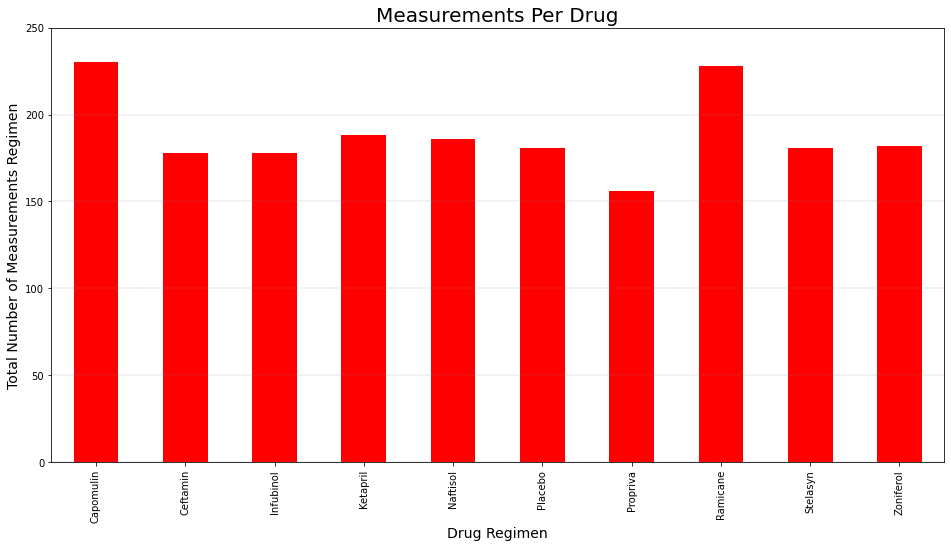

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_by_drug = df_drug['Tumor Volume (mm3)'].count()
plot1 = count_by_drug.plot(kind='bar',color = 'r', figsize=(16,8))
plot1.set_xlabel('Drug Regimen',fontsize=14)
plot1.set_ylabel('Total Number of Measurements Regimen',fontsize=14)
plot1.set_title('Measurements Per Drug',fontsize=20)
plot1.set_ylim(0,250)
plot1.yaxis.grid(True, color='grey', linestyle='--', linewidth=0.3)
plt.show()

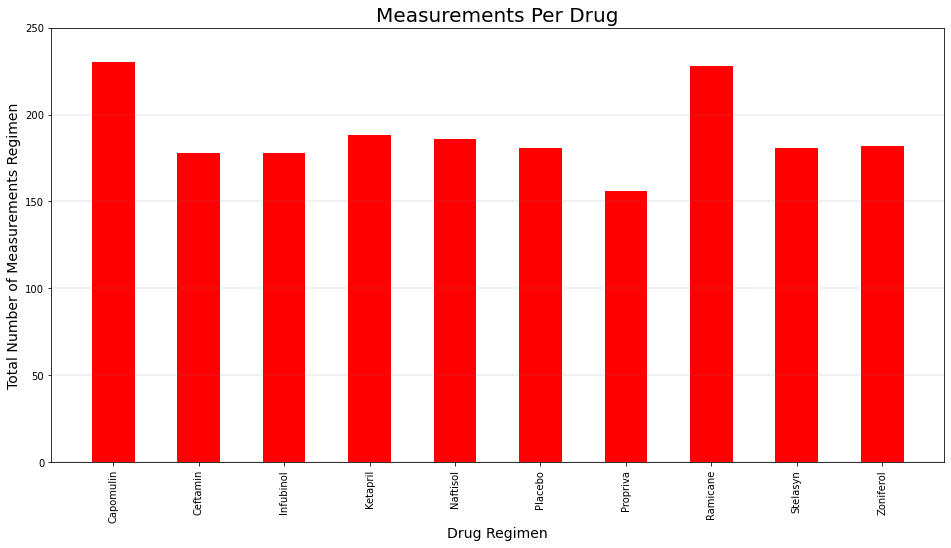

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
axis_x = count_by_drug.index
axis_y = count_by_drug.values
plt.subplots(figsize=(16, 8))
plt.bar(axis_x, axis_y, width=0.5, color='r', align="center")
plt.xlabel('Drug Regimen',fontsize=14)
plt.ylabel('Total Number of Measurements Regimen',fontsize=14)
plt.xticks(rotation=90)
plt.title('Measurements Per Drug',fontsize=20)
plt.ylim(0,250)
plt.grid(axis='y',color='grey', linestyle='--', linewidth=0.3)
plt.show()

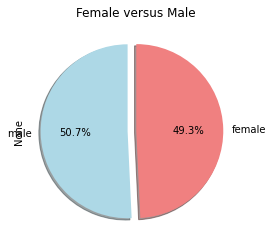

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male = len(df_clean.loc[df_clean['Sex']=='Male'])
female = len(df_clean.loc[df_clean['Sex']=='Female'])
explode = (0.1,0)
pie_sex = pd.Series([male,female])
colors = ["lightblue","lightcoral"]
pie_labels = ['male','female']
pie_plot=pie_sex.plot(kind='pie',y = pie_sex.values, title = 'Female versus Male', explode = explode, colors=colors,startangle=90, labels = pie_labels, shadow = True, autopct="%1.1f%%")


plt.show()

Text(0.5, 1.0, 'Female versus Male')

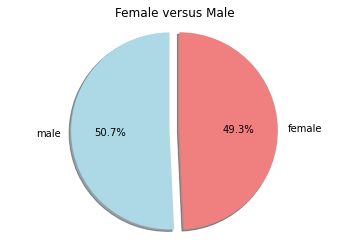

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
df_clean['Sex'].unique()
male = len(df_clean.loc[df_clean['Sex']=='Male'])
female = len(df_clean.loc[df_clean['Sex']=='Female'])
pie_sex = [male,female]
explode = (0.1,0)
plt.pie(pie_sex, explode = explode, labels=pie_labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title('Female versus Male')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = df_drug['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df_clean1 = pd.merge(df_clean,max_timepoint, on= 'Drug Regimen', how = 'outer')

df_clean1 = df_clean1.rename(columns={'Timepoint_x' : "Timepoint", 'Timepoint_y' : "Max Timepoint"})

df_final_timepoint = df_clean1.loc[df_clean1['Timepoint']==df_clean1['Max Timepoint'],:]
df_capomulin = df_final_timepoint.loc[df_final_timepoint['Drug Regimen']=='Capomulin',:]
df_capomulin = df_capomulin[['Mouse ID','Tumor Volume (mm3)']]
df_capomulin = df_capomulin.rename(columns={'Tumor Volume (mm3)':'Capomulin Final Tumor Volume (mm3)'})
#print(df_capomulin)
df_Ramicane = df_final_timepoint.loc[df_final_timepoint['Drug Regimen']=='Ramicane',:]
df_Ramicane = df_Ramicane[['Mouse ID','Tumor Volume (mm3)']]
df_Ramicane = df_Ramicane.rename(columns={'Tumor Volume (mm3)':'Ramicane Final Tumor Volume (mm3)'})
#print(df_Ramicane)
df_Infubinol = df_final_timepoint.loc[df_final_timepoint['Drug Regimen']=='Infubinol',:]
df_Infubinol = df_Infubinol[['Mouse ID','Tumor Volume (mm3)']]
df_Infubinol = df_Infubinol.rename(columns={'Tumor Volume (mm3)':'Infubinol Final Tumor Volume (mm3)'})
#print(df_Infubinol)
df_Ceftamin = df_final_timepoint.loc[df_final_timepoint['Drug Regimen']=='Ceftamin',:]
df_Ceftamin = df_Ceftamin[['Mouse ID','Tumor Volume (mm3)']]
df_Ceftamin = df_Ceftamin.rename(columns={'Tumor Volume (mm3)':'Ceftamin Final Tumor Volume (mm3)'})
#print(df_Ceftamin)

final_volumne_df = pd.merge(df_capomulin,df_Ramicane, on='Mouse ID', how = 'outer')
final_volumne_df = pd.merge(final_volumne_df,df_Infubinol, on='Mouse ID', how = 'outer')
final_volumne_df = pd.merge(final_volumne_df,df_Ceftamin, on='Mouse ID', how = 'outer')
final_volumne_df.head()

,Mouse ID,Capomulin Final Tumor Volume (mm3),Ramicane Final Tumor Volume (mm3),Infubinol Final Tumor Volume (mm3),Ceftamin Final Tumor Volume (mm3)
0,s185,23.343598,NaN,NaN,NaN
1,x401,28.484033,NaN,NaN,NaN
2,m601,28.430964,NaN,NaN,NaN
3,u364,31.023923,NaN,NaN,NaN
4,y793,31.896238,NaN,NaN,NaN


In [88]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 
              'Stelasyn', 'Zoniferol']

# Create empty list to fill with tumor vol data (for plotting)
volume_list = []
for treatment in treatments
    volume_list.append


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

SyntaxError: invalid syntax (<ipython-input-88-ddaadec8dfca>, line 6)

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
